# Module 3: Water flow in roots

by Daniel Leitner, Andrea Schnepf 

## Theory


In this module, we consider water flow in xylem with the soil water potential considered static. The derivation of this problem is based on Roose and Fowler (2004) and Doussan et al. (2006).


The axial water flux in a xylem is given by 
\begin{eqnarray} 
q_z = - k_z \left( \frac{\partial \psi_r}{\partial z} - e_z \cdot v \right), \label{axialflux}
\end{eqnarray}
with units [cm$^3$ day$^{-1}$], see Eqn 3.1 Roose and Fowler, 2004. 
The parameter $k_z$ is the axial conductance [cm$^3$ day$^{-1}$], 
$\psi_r$ is the pressure inside the xylem [cm], 
$e_z$ the downward unit vector [1],
and $v$ the normed direction of the xylem [1]. Thus Eqn \ref{axialflux} can be expressed as
\begin{eqnarray}
q_z = - k_z \left( \frac{\partial \psi_r}{\partial z} + v_3 \right), \label{axialflux2}
\end{eqnarray}
where $v_3$ is the $z$-component of the normed xylem direction. \\

\noindent
The radial flux is given by 
\begin{eqnarray}
q_r = - 2 a \pi l k_r (\psi_s - \psi_r),
\end{eqnarray}
with units [cm$^3$ day$^{-1}$] (based on Eqn 3.3 Roose and Fowler, 2004), 
where $a$ is the root radius [cm], 
$l$ is the segments length [cm], 
$k_r$ is the radial conductance [day$^{-1}$], 
and $\psi_s$ is the soil matric potential of the surrounding soil [cm]. \\

\noindent
The net flux is given by
\begin{eqnarray}
q = q_z + q_r,
\end{eqnarray} 
and mass conservation yields
\begin{eqnarray}
2 a \pi k_r (\psi_s - \psi_r) = - k_z \frac{\partial^2 \psi_r}{\partial z^2} \label{masscons}
\end{eqnarray}
(see Eqn 3.4 Roose and Fowler, 2004).

\noindent
For discretisation we use first Kirchhoff's law: In a graph that represents the root system for each node $i$ the sum of fluxes must be zero 
\begin{eqnarray}
\sum_{j \in N(i)} q_{ij} = 0,  \label{KH}
\end{eqnarray}
where $N(i)$ are the nodes that are connected to node $i$ and $q_{ij}$ is the net flux of the edge connecting node $i$ and node $j$.


## Benchmarks


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from math import *
from rsml import * # located in the same directory 

### Benchmark M3.1: A Single Root in a Static Soil

In this benchmark problem we assume a vertical single root segment surrounded by a static soil with constant soil matric potential. At the root collar we prescribe constant pressure, at the root tip a no-flux boundary condition is applied.   

We choose the following parameters: 

In [10]:
L = 50            # length of single straight root [cm]
a = 0.2           # radius  [cm]
kx = 4.32e-2      # axial conductivity [cm^3 / day]
kr = 1.728e-4     # radial conductivity [1 / day] 
p_s = -200        # static soil matric potiential [cm]
p0 = -1000        # dirichlet bc at top [cm]

### Analytical solution

For constant $k_r$ and $k_z$ we can solve Eqn \ref{masscons} yielding 
\begin{eqnarray}
\psi_r(z) := \psi_s + d_1 e^{\sqrt{c} z } + d_2 e^{-\sqrt{c} z} \label{analytic_flux}
\end{eqnarray} 
with $c = 2 a \pi k_r / k_z$. 

In the following the constants $d_1$, and $d_2$ [cm] are calculated from the boundary conditions.
The Dirichlet boundary conditions at the top $\psi_r(0) =\psi_0$ is inserted into the analytic solution Eqn \ref{analytic_flux}, and yields
\begin{eqnarray}
\psi_s + d_1  + d_2  = \psi_0.
\end{eqnarray}

The Neumann boundary conition $q_z(L) = 0$ (Eqn \ref{axialflux2}) leads to 
\begin{eqnarray}
\frac{\partial \psi_r}{\partial z} (L) = v_3.
\end{eqnarray}
Using the derivation of the analytical solution yields
\begin{eqnarray}
d_1 \sqrt{c} e^{\sqrt{c} L } - d_2 \sqrt{c} e^{-\sqrt{c} L}  = v_3.
\end{eqnarray}


For a straight segment $v_3 = -1$. Therefore, we solve 
\begin{align}
\left(\begin{array}{cc}
  1 & 1  \\
 \sqrt{c} \exp{(\sqrt{c} L)} & -\sqrt{c} \exp{(-\sqrt{c} L)} \\
\end{array}\right)
\left(\begin{array}{c}
  d_{1}  \\
  d_{2}  \\
\end{array}\right)
{} &= 
\left(\begin{array}{c}  
  \psi_0-\psi_s \\
  -1 \\
\end{array}\right)
\end{align}

We solve for the constants $d_1$, and $d_2$, and plot the results

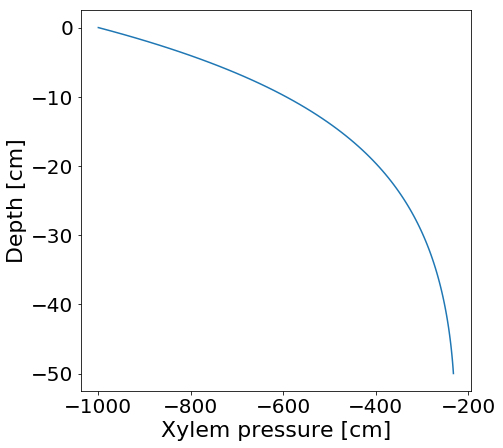

In [11]:
# Analytical solution
c = 2*a*pi*kr/kx
p_r = lambda z: p_s + d[0]*exp(sqrt(c)*z) + d[1]*exp(-sqrt(c)*z)

# Boundary conditions
AA = np.array([[1,1], [sqrt(c)*exp(sqrt(c)*(-L)), -sqrt(c)*exp(-sqrt(c)*(-L))] ]) 
bb = np.array([p0-p_s, -1]) 
d = np.linalg.solve(AA, bb) 

# Plot results
fig=plt.figure(figsize=(7, 7))
za_ = np.linspace(0,-L,100)
pr = list(map(p_r, za_))
plt.plot(pr,za_)
plt.xlabel("Xylem pressure [cm]")
plt.ylabel("Depth [cm]")
plt.show()

### Benchmark M3.2: Root System

In the following benchmark, we extend benchmark M3.1 from a single root to a root system. We consider water flow inside a small static root system of a lupine plant which was grown for 14 days in a soil-filled column of 20 cm depth and 7 cm diameter. The root system was imaged by MRI at Forschungszentrum Jülich; the resulting root grid is provided in RSML, DGF and RootSys formats in the folder "root_grid/RootSystem.rsml".  

In [4]:
polylines, props, funcs = read_rsml("root_grid/RootSystem.rsml")
print("Properties:") # one per root
for key, v in props.items() :
    print("\t", key)
print("Functions:") # oner per root node
for key, v in funcs.items() :
    print("\t", key)

Properties:
	 parent-poly
	 length
	 type
	 parent-branch
	 parent-node
Functions:
	 emergence_time
	 diameter


We can visualize this small root system by the following script, where colors denote the root type:

<Figure size 432x288 with 0 Axes>

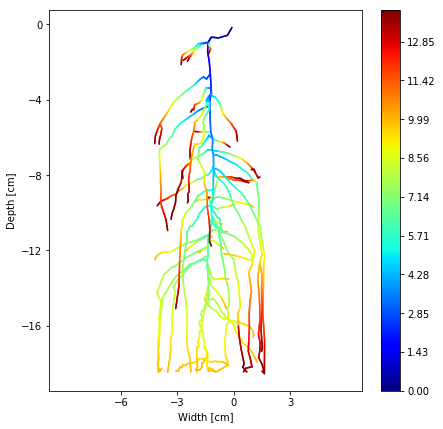

In [5]:
et_ = funcs["emergence_time"]
cmap = plt.get_cmap("jet", 256)

cb = plt.contourf([[0,0],[0,0]], np.linspace(0, 14, 256), cmap=cmap) # Using contourf to provide a colorbar info
plt.clf()
plt.figure(figsize=(7,7))

for i, pl in enumerate(polylines):
    for j in range(0, len(pl)-1):        
        n1, n2, et = pl[j], pl[j+1], et_[i][j+1]
        plt.plot([n1[1]/10, n2[1]/10], [n1[2]/10, n2[2]/10], color = cmap(et/14))  # y,z plot
       
plt.axis('equal')
plt.xlabel("Width [cm]")
plt.ylabel("Depth [cm]")
plt.xticks(np.arange(-6,4,3))
plt.yticks(np.arange(-16,1,4))
plt.colorbar(cb)
plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title
#plt.savefig('rootsystem.png', dpi=300, bbox_inches = "tight")
plt.show()

For benchmark M3.2(a) we first neglect root age and define static conductivities according to Javaux et al. (2008), and define boundary conditions as in Benchmark M3.1: At the root collar we assume a pressure of -500 cm located at node index 0, and a no-flux boundary condition at the root tips. The soil is assumed to be static with a matric potential of -200 cm. 

Aim is to calculate the pressure at the nodes. 

In [6]:
kx = 4.32e-2      # axial conductivity [cm^3 / day]
kr = 1.728e-4     # radial conductivity [1 / day] 
p_s = -200        # static soil matric potiential [cm]
p0 = -500         # dirichlet bc at top [cm]

Since there is no analytical solution available to this problem, we can validate numerical codes by inter-comparison. 

In Benchmark M3.2(b) we are interested in the influence of age dependent radial and axial conductivities, assuming that roots get a higher axial conductivity and lower radial conductivity as they get older. 

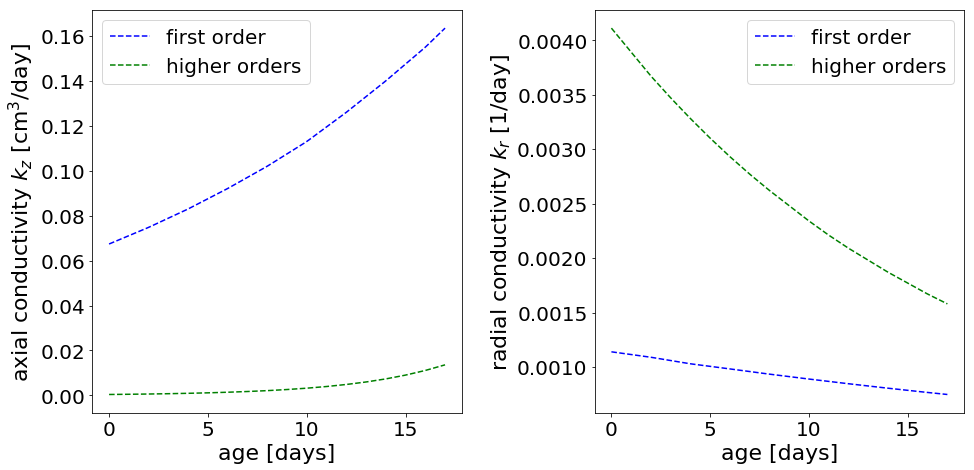

In [7]:
from scipy import interpolate
kx0 = np.array([[32,3.57E-01],[30,3.21E-01],[28,2.90E-01],[26,2.61E-01],[24,2.35E-01],[22,2.12E-01],[20,1.91E-01],
                [18,1.72E-01],[16,1.55E-01],[14,1.40E-01],[12,1.26E-01],[10,1.13E-01],[8,1.02E-01],[6,9.21E-02], 
                [4,8.30E-02],[2,7.48E-02],[0,6.74E-02]])
kr0 = np.array([[32,5.17E-04],[30,5.43E-04],[28,5.70E-04],[26,5.99E-04],[24,6.30E-04],[22,6.62E-04],[20,6.95E-04],
                [18,7.30E-04],[16,7.67E-04],[14,8.06E-04],[12,8.47E-04],[10,8.90E-04],[8,9.35E-04],[6,9.83E-04],
                [4,1.03E-03],[2,1.09E-03],[0,1.14E-03]])
kx1 = np.array([[17,1.36E-02],[16,1.11E-02],[15,9.03E-03],[14,7.34E-03],[13,5.97E-03],[12,4.86E-03],[11,3.95E-03],
                [10,3.21E-03],[9,2.61E-03],[8,2.12E-03],[7,1.73E-03],[6,1.41E-03],[5,1.14E-03],[4,9.30E-04],
                [3,7.56E-04],[2,6.15E-04],[1,5.00E-04],[0,4.07E-04]])
kr1 = np.array([[17,1.58E-03],[16,1.67E-03],[15,1.77E-03],[14,1.87E-03],[13,1.98E-03],[12,2.09E-03],[11,2.21E-03],
                [10,2.34E-03],[9,2.48E-03],[8,2.62E-03],[7,2.77E-03],[6,2.93E-03],[5,3.10E-03],[4,3.28E-03],
                [3,3.47E-03],[2,3.67E-03],[1,3.89E-03],[0,4.11E-03]])
kx0_ = interpolate.interp1d(kx0[:,0], kx0[:,1])
kr0_ = interpolate.interp1d(kr0[:,0], kr0[:,1])
kx1_ = interpolate.interp1d(kx1[:,0], kx1[:,1], fill_value = 1.36E-02, bounds_error = False)
kr1_ = interpolate.interp1d(kr1[:,0], kr1[:,1], fill_value = 1.58E-03, bounds_error = False)

# Plot function 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
age_ = np.linspace(0,17,100)
ax1.plot(age_,kx0_(age_), "b--")
ax1.plot(age_,kx1_(age_), "g--")
ax1.set_xlabel("age [days]")
ax1.set_ylabel("axial conductivity $k_z$ [cm$^3$/day]")
ax1.legend(["first order", "higher orders"])
ax2.plot(age_,kr0_(age_), "b--")
ax2.plot(age_,kr1_(age_), "g--")
ax2.set_ylabel("radial conductivity $k_r$ [1/day]")
ax2.set_xlabel("age [days]")
ax2.legend(["first order", "higher orders"])

fig.tight_layout()
plt.show()

## Comparison to numerical solutions

We compare different numerical codes by solving the benchmarking problems. In the following we link to notebooks already containing Benchmark M3.1, M3.2, and M3.3

* [Homegrown Python Code from Schnepf et al. 2018](Xylem flux - Python code.ipynb)
* [Dumux](Xylem flux - Dumux.ipynb)

### Benchmark M3.1 

For an automatic comparison of the numerical results, save the results in a text file with two lines, containing comma separated depth values [cm] in the first line, and pressure head [cm] in the second, located in the folder `/root_water_flow/M31/simulatorname`.

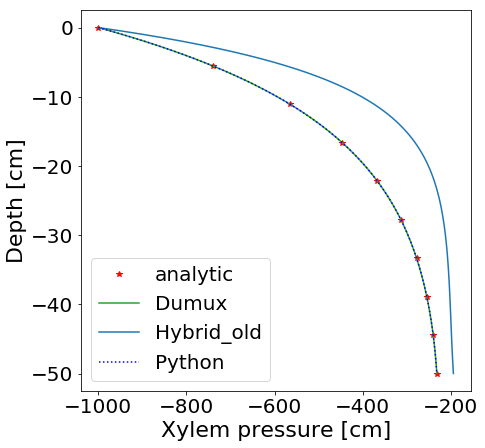

Name		 N	 Rsme		 R²		 R
Dumux		 100 	 0.00000003 	 1.00000920 	 1.00000000
Hybrid_old		 101 	 199557765.43734002 	 1.52700844 	 0.93254514
Python		 100 	 0.00000035 	 0.99998960 	 1.00000000


In [17]:
fig=plt.figure(figsize=(7,7))   # analytical solution
y = np.linspace(0,-50,10)
plt.plot(list(map(p_r, y)),y,"r*")

j = 0 # number of files
r, rsme, rsquare, nn = [], [], [], []
col=["C2","C0","b:"]
l = ["analytic"]
for dirname, dirnames, filenames in os.walk('root_water_flow/M31/.'):
    filenames.sort()
    for i,f in enumerate(filenames):
        try:
            l.append(f)
            data = np.loadtxt("root_water_flow/M31/"+f,delimiter=',')
            plt.plot(data[1,:],data[0,:],col[i]) # numeric solution         
            j += 1     
            # Evaluate
            n = len(data[1,:])
            nn.append(n)
            pr_ = list(map(p_r, data[0,:])) # exact solution at data depth points  
            # calculate R
            om = np.mean(data[1,:])
            pm = np.mean(pr_)
            r_ =  np.sum((data[1,:]-om)*(pr_-pm)) / (np.sqrt(np.sum(np.square(data[1,:]-om)))*np.sqrt(np.sum(np.square(pr_-pm))) )
            r.append(r_*r_)
            # calculate R^2
            meany = np.mean(data[1,:])
            r2 = np.sum(np.square(pr_-meany)) / np.sum(np.square(data[1,:]-meany))                         
            rsquare.append(r2)            
            # calculate RSME
            rsme_ = np.square(np.sum(np.square(data[1,:]-pr_)/n))
            rsme.append(rsme_)                
        except Exception as ex:
            print("Something went wrong with file "+f)    
            print(ex)            
plt.xlabel("Xylem pressure [cm]")
plt.ylabel("Depth [cm]")
plt.legend(l)
#plt.xticks(np.arange(-6,4,3))
#plt.yticks(np.arange(-16,1,4))
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title
plt.savefig('m31_results.png', dpi=300, bbox_inches = "tight")
plt.show()
print("Name\t\t", "N\t", "Rsme\t\t", "R²\t\t", "R")
for i in range(0,j):
    print(l[i+1]+"\t\t",nn[i],"\t",'{:2.8f}'.format(rsme[i]),"\t", '{:2.8f}'.format(rsquare[i]),"\t",'{:2.8f}'.format(r[i]) ) 

## Benchmark M3.2

### Benchmark M3.2(a)

For an inter-comparison of the numerical results save the results in a text file with two lines, containing comma separated depth values [cm] in the first line, and pressure head [cm] in the second line. Locate the file in the folder `/root_water_flow/M32a/simulatorname`.  

### Benchmark M3.2(b)

For an inter-comparison of the numerical results save the results in a text file with two lines, containing comma separated depth values [cm] in the first line, and pressure head [cm] in the second line. Locate the file in the folder `/root_water_flow/M32b/simulatorname`.

1. Hybrid (b*):
from  -500.0 to -201.45  cm pressure head

2. dumux_m32a (g*):
from  -500.0 to -240.75942915392454  cm pressure head

3. python (rv):
from  -500.0 to -240.82288229821134  cm pressure head

1. Hybrid (b*):
from  -500.0 to -198.86  cm pressure head

2. dumux_m32b (g*):
from  -500.0 to -199.22631562181448  cm pressure head

3. python (rv):
from  -500.0 to -198.95391567540827  cm pressure head



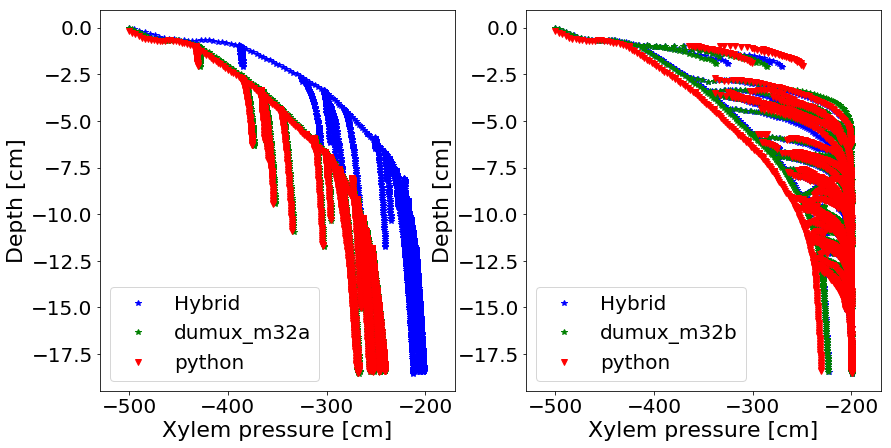

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(14,7)) 
col = ["b*", "g*", "rv", "gv", "bv"]
# M32a
l=[]
for dirname, dirnames, filenames in os.walk('root_water_flow/M32a/.'):
    filenames.sort()
    for i,f in enumerate(filenames):
        try:
            l.append(f)
            data = np.loadtxt("root_water_flow/M32a/"+f,delimiter=',')        
            print(str(i+1)+". "+f+" ("+col[i]+"):")
            print("from ", min(data[1,:]), "to", max(data[1,:]), " cm pressure head\n")        
            pl, = ax[0].plot(data[1,:],data[0,:],col[i])
        except Exception as ex:
            print("Something went wrong with file "+f)    
            print(ex)             
ax[0].set_xlabel("Xylem pressure [cm]")  
ax[0].set_ylabel("Depth [cm]")  
ax[0].legend(l)

# M32b
l=[]
for dirname, dirnames, filenames in os.walk('root_water_flow/M32b/.'):
    filenames.sort()
    for i,f in enumerate(filenames):
        try:
            l.append(f)
            data = np.loadtxt("root_water_flow/M32b/"+f,delimiter=',')        
            print(str(i+1)+". "+f+" ("+col[i]+"):")
            print("from ", min(data[1,:]), "to", max(data[1,:]), " cm pressure head\n")        
            #plt.plot(data[1,:],data[0,:],col[i])
            pl, = ax[1].plot(data[1,:],data[0,:],col[i])
        except Exception as ex:
            print("Something went wrong with file "+f)    
            print(ex)
    
ax[1].set_xlabel("Xylem pressure [cm]")  
ax[1].set_ylabel("Depth [cm]")
ax[0].set_xlim(-530,-170) 
ax[1].set_xlim(-530,-170)
ax[1].legend(l)

plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title
plt.savefig('m32_results.png', dpi=300, bbox_inches = "tight")
plt.show() 

## References

Doussan, C., Pierret, A., Garrigues, E., and Pages, L. (2006). Water uptake by plant roots: II - Modelling of water transfer in the soil root-system with explicit account of flow within the root system - comparison with experiments. *Plant and Soil*, 283(1-2):99–117.

Roose, T. and Fowler, A. C. (2004). A model for water uptake by plant roots. *Journal of Theoretical Biology*, 228(2):155–171.

Schnepf, A., Leitner, D., Landl, M., Lobet, G., Mai, T.H., Morandage S., Sheng, C., Zoerner, M., Vanderborght, J., Vereecken, H. (2018) CRootBox: a structural-functional modelling framework for root systems. *Annals of Botany*, 121 (5), 1033-1053
